<span style="color:gray">Интеллектуальный анализ данных в R и Python. Лекция 1</span>

### 2.  Обучение с учителем. Модель линейной регрессии.

<font color='blue'>Линейная регрессия</font> предполагает, что целевой объект $y$ является линейной комбинацией входных объектов $X = \{x_1,\dots,x_n\}$:

$$
\hat{y}(\theta,x) = \theta_0 + \theta_1 x_1 + \dots + \theta_n x_n.
$$

Параметры линейной модели $\theta = (\theta_0, \dots, \theta_n)$ могут быть оценены с помощью метода наименьших квадратов. Задача оптимизации параметров модели называется <font color='blue'>обучением модели</font> и заключается в следующем:
$$
\underset{\theta}{min\,} {{\| X \theta - y \|_2}^2}.
$$


Построим модель линейной регрессии.

Загрузим базовые библиотеки [Numpy](http://www.numpy.org/), [Pandas](https://pandas.pydata.org/), [Matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) и [scikit-learn](http://scikit-learn.org/stable/).  

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

import matplotlib.mlab as mlab

Для построения модели линейной регрессии используем функцию [`sklearn.linear_model.LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression), который использует реализацию наименьших квадратов из библиотеки [`scipy.linalg.lstsq`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html).

Сгеренируем искусственный регрессионный набор данных с помощью функции [`sklearn.datasets.make_regression`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html).

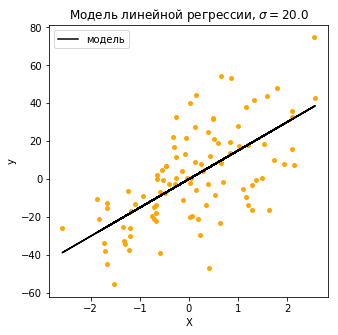

In [25]:
X, y, coef = make_regression(n_samples=100, n_features=1, noise=20.0, coef=True, random_state=38)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.scatter(X, y, c='orange', s=15) #, s=10, cmap=plt.cm.Set1)
ax.plot(X,np.dot(coef,X), '-', color='black', label='модель')
ax.legend(loc='upper left')
ax.set(xlabel='X',ylabel='y',title='Модель линейной регрессии, $\sigma=20.0$')

plt.show();

Обученная на <font color='blue'>обучающей выборке</font> модель должна предсказывать значения на некоторой неизвестной или <font color='blue'>тестовой выборке </font> данных. Работая здесь с искусственно сгенерированными данными, отделим $ 40 \% $ данных для тестирования. Эта процедура будет повторять и визуализировать полученные таким образом модели.

Для оценки качества модели, можно использовать метрики реализованные в Sciki-Learn: [Regression metrics](http://scikit-learn.org/stable/modules/classes.html#regression-metrics)); 
[`sklearn.metrics.explained_variance_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html);
[`sklearn.metrics.r2_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score);
[`sklearn.linear_model.LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

Метод наименьших квадратов дает байесовское оптимальное решение, предполагая, что фактическая модель линейна и что шум в целевом векторе $ y $ нормально распределен. Это предположение может быть визуально проверено путем нахождения вычетов - отклонений от прогнозируемого значения $ \hat {y} $ для каждого наблюдения из обучающей выборки.

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


Объяснённая дисперсия: 0.69


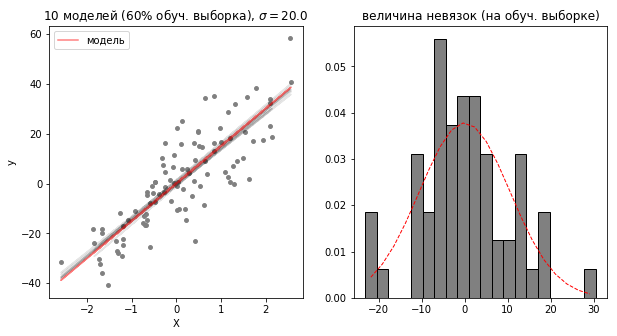

In [26]:
#X, y, coef = make_regression(n_samples=100, n_features=1, noise=20.0, coef=True, random_state=38)
# X, y, coef = make_regression(n_samples=3000, n_features=1, noise=20.0, coef=True, random_state=38)

X, y, coef = make_regression(n_samples=100, n_features=1, noise=11.0, coef=True, random_state=38)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(X, y, c='gray', s=15)

for temp in range(10):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4) # , random_state=42)

    model = Pipeline([('linear', LinearRegression())])
    model.fit(X_train, y_train)
    
    ax[0].plot(X_train,model.predict(X_train), '-', color='black', alpha=0.1) #, label='linearni model')

ax[0].plot(X,np.dot(coef,X), '-', color='red', alpha=0.5, label='модель')
ax[0].set(xlabel='X',ylabel='y',title='10 моделей (60% обуч. выборка), $\sigma=20.0$')
ax[0].legend(loc='upper left')

# Residuals
residuals = model.predict(X_train)-y_train
n, bins, patches = ax[1].hist(residuals,bins=20,normed=True,color='gray',edgecolor='black')

bincenters = 0.5*(bins[1:]+bins[:-1])
y_norm = mlab.normpdf( bincenters, np.mean(residuals), np.std(residuals))
l = ax[1].plot(bincenters, y_norm, 'r--', linewidth=1, label='gaussian')

ax[1].set(title='величина невязок (на обуч. выборке)')

print('Объяснённая дисперсия: ' + '{0:.2f}'.format(explained_variance_score(y_train,model.predict(X_train))))

plt.show();

Загрузим реальный набор данных и построим модель линейной регрессии.

In [27]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
diabetes = pd.DataFrame(data=np.c_[diabetes['data'], diabetes['target']], 
                             columns=np.append(['X'+str(i) for i in range(len(diabetes['data'][0]))],'target'))
diabetes.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [28]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
X0        442 non-null float64
X1        442 non-null float64
X2        442 non-null float64
X3        442 non-null float64
X4        442 non-null float64
X5        442 non-null float64
X6        442 non-null float64
X7        442 non-null float64
X8        442 non-null float64
X9        442 non-null float64
target    442 non-null float64
dtypes: float64(11)
memory usage: 38.1 KB


Для облегчения визуализации выберем один признак, на котором рассмотрим поведение линейной модели.

In [29]:
diabetes.drop('target',axis=1).corrwith(diabetes['target']) 

X0    0.187889
X1    0.043062
X2    0.586450
X3    0.441484
X4    0.212022
X5    0.174054
X6   -0.394789
X7    0.430453
X8    0.565883
X9    0.382483
dtype: float64

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


Объяснённая дисперсия: 0.37


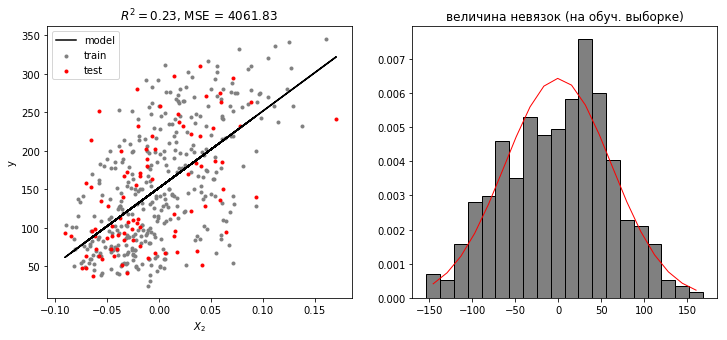

In [30]:

diabetes_train, diabetes_test = train_test_split(diabetes[['X2','target']], test_size=0.20, random_state=42)

model = Pipeline([('linear', LinearRegression())])
model = model.fit(diabetes_train.drop('target',axis=1),diabetes_train['target'])

diabetes_target_pred = model.predict(diabetes_test.drop('target',axis=1))

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(diabetes_train.drop('target',axis=1).values, diabetes_train['target'], color='gray', marker='.', label='train')
ax[0].scatter(diabetes_test.drop('target',axis=1).values, diabetes_test['target'], color='red', marker='.', label='test')

ax[0].plot(diabetes_test.drop('target',axis=1).values, diabetes_target_pred, color='black', label='model')

R2 = r2_score(diabetes_test['target'], diabetes_target_pred) # Objasnjena varijanca
# R2 = model.score(diabetes_test.drop('target',axis=1),diabetes_test['target']) # Ekvivalentno za LinearRegression()

MSE = mean_squared_error(diabetes_test['target'], diabetes_target_pred) # Srednja kvadratna pogreska

ax[0].set(title='$R^2 = $'+'{0:.2f}'.format(R2)+', MSE = '+'{0:.2f}'.format(MSE))
ax[0].set(xlabel='$X_2$',ylabel='y')
ax[0].legend(loc='upper left')


# Величина невязок
residuals = model.predict(diabetes_train.drop('target',axis=1))-diabetes_train['target']
n, bins, patches = ax[1].hist(residuals,bins=20,normed=True,color='gray',edgecolor='black')

bincenters = 0.5*(bins[1:]+bins[:-1])
y_norm = mlab.normpdf( bincenters, np.mean(residuals), np.std(residuals))
l = ax[1].plot(bincenters, y_norm, 'r-', linewidth=1, label='gaussian')

ax[1].set(title='величина невязок (на обуч. выборке)')

explained_variance = explained_variance_score(diabetes_train['target'],model.predict(diabetes_train.drop('target',axis=1)))
print('Объяснённая дисперсия: ' + '{0:.2f}'.format(explained_variance))

plt.show();

In [31]:
# коэффициент модели линейной регрессии для выбранного признака X2
print(model.named_steps['linear'].coef_)

[998.57768914]


Построим модель данных на полном наборе признаков.

In [32]:
diabetes_train, diabetes_test = train_test_split(diabetes, test_size=0.20, random_state=42)

model = Pipeline([('linear', LinearRegression())])
model = model.fit(diabetes_train.drop('target',axis=1),diabetes_train['target'])

diabetes_target_pred = model.predict(diabetes_test.drop('target',axis=1))

R2 = r2_score(diabetes_test['target'], diabetes_target_pred) # Objasnjena varijanca
MSE = mean_squared_error(diabetes_test['target'], diabetes_target_pred) # Srednja kvadratna pogreska

print('R2 = '+'{0:.2f}'.format(R2)+', MSE = '+'{0:.2f}'.format(MSE))

plt.show();

R2 = 0.45, MSE = 2900.17


Объяснённая дисперсия: 0.53


/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if __name__ == '__main__':


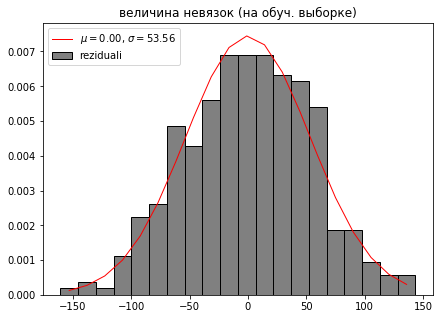

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

residuals = model.predict(diabetes_train.drop('target',axis=1))-diabetes_train['target']
n, bins, patches = ax.hist(residuals, bins=20, normed=True, color='gray', edgecolor='black', label='reziduali')

bincenters = 0.5*(bins[1:]+bins[:-1])
residuals_mu = np.mean(residuals)
residuals_std = np.std(residuals)
y_norm = mlab.normpdf( bincenters, residuals_mu, residuals_std )
l = ax.plot(bincenters, y_norm, 'r-', linewidth=1, 
            label='$\mu='+'{0:.2f}'.format(residuals_mu)+'$, $\sigma='+'{0:.2f}'.format(residuals_std)+'$')

ax.set(title='величина невязок (на обуч. выборке)')
ax.legend(loc='upper left')

explained_variance = explained_variance_score(diabetes_train['target'],model.predict(diabetes_train.drop('target',axis=1)))
print('Объяснённая дисперсия: ' + '{0:.2f}'.format(explained_variance))

plt.show();

In [34]:
# коэффициенты модели линейной регрессии для всех признаков, включая X2
for i in zip(diabetes.drop('target',axis=1).columns,model.named_steps['linear'].coef_):
    print(i)

('X0', 37.900314258246546)
('X1', -241.96624835284473)
('X2', 542.4257534189246)
('X3', 347.70830529228056)
('X4', -931.4612609313981)
('X5', 518.0440554737877)
('X6', 163.4035347647287)
('X7', 275.3100383668234)
('X8', 736.1890983908114)
('X9', 48.671124882801195)


<font color='green'>Задание для самостоятельной работы:</font>

1. Построить модель линейной регрессии на сгенерированном и реальном наборах данных, запуская ячейки в данном Jupyter Notebook и меняя значения параметров модели и метрик. 
1. Создать ячейку Объяснить, что означает величина коэффициентов при каждом признаке и как изменилось значение коэффициента при X2 при добавлении всего набора признаков. 
1. Загрузить результирующий .ipynb файл в папку /assignments/. Файлы должны именоваться как:<br>
   *'Lecture_1_' + surname*.

#### Обозначение величины коэфициентов у признаков  

Коэфициенты признаков указывают на: направление тренда (в зависимости от знака восходящий/нисходящий) и на величину угла наклона линии  

#### Зависимость коэфициента от X2 с добавленем всего набора

Коэфициент при X2 уменьшается